<a href="https://colab.research.google.com/github/betr0dalf/PZMS/blob/main/PZMS_NovikovDV_prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладные задачи математической статистики
# Практическая работа № 4
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

# Задание №1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
from scipy.stats import norm, gamma, f, t, laplace, chi2
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [ ]:
def create_bins(data):

    # Размер выборки
    n = len(data)

    # Число групп по правилу Стёрджесса
    m = round(1 + 3.322 * np.log10(n))

    # Минимальное и максимальное значение
    min_height = np.min(data)
    max_height = np.max(data)

    # Подсчет шага интервала
    interval_size = (max_height - min_height) / m

    # Определение границы интервалов
    start = min_height - 0.01
    end = max_height + 0.01

    # Подсчет границы интервалов
    intervals = np.arange(start, end, interval_size)

    return intervals

In [ ]:
# Критерий Пирсона для нормального распределения

def pirson_norm(obs_data, bins):

    # Подсчет наблюдаемых частот (абсолютная частота)
    observed_frequencies, _ = np.histogram(obs_data, bins=bins)

    mean_num = np.mean(obs_data)
    std_num= np.std(obs_data)

    # Вычисление ожидаемых частот (относительные частоты)
    expected_frequencies = []
    for i in range(len(bins) - 1):
        expected_count = len(obs_data) * (laplace.cdf((bins[i+1]-mean_num)/std_num)-laplace.cdf((bins[i]-mean_num)/std_num))
        expected_frequencies.append(expected_count)

    expected_frequencies = np.array(expected_frequencies)

    # Вычисление статистики хи-квадрат
    chi_square_statistic = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)

    # Степени свободы
    degrees_of_freedom = len(bins) - 2 - 1

    # Уровень значимости
    alpha = 0.05

    # Критическое значение хи-квадрат
    critical_value = chi2.ppf(1 - 0.05, degrees_of_freedom)

    print(f"Статистика хи-квадрат: {(chi_square_statistic)}")
    print(f"Критическое значение хи-квадрат для уровня значимости : {critical_value}")

    # Проверка гипотезы
    if (chi_square_statistic) > critical_value:
        print("Гипотеза о показательном распределении отвергается.")
    else:
        print("Гипотеза о показательном распределении не отвергается.")

In [ ]:
# Анаморфоза нормального распределения

def anamorphosis_norm(data, intervals):

   # Распределение по интервалам и подсчет частот
    absolute_count = pd.cut(data, bins=intervals, right=False).value_counts().sort_index()

    # Относительные частоты
    wi = absolute_count / len(data)

    dlt = [i for i, num in enumerate(wi) if num == 0]
    intervals = np.delete(intervals, dlt, axis=0)
    wi = np.delete(wi, dlt)

    y = np.log(wi)
    # Вычисление центров интервалов
    centres = []
    for i in range(len(intervals)):
        # Проверка, чтобы не выйти за пределы массива
        if i < len(intervals) - 1:
            centre = (intervals[i] + intervals[i + 1]) / 2
            centres.append(centre)

    centres = np.array(centres)

    mean = np.mean(data)
    mae = (centres - mean) ** 2

    X_new = mae.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_new, y)
    W = np.array([model.intercept_, model.coef_[0]])

    k = W[1]
    std = np.sqrt(-1 / (2 * k))

    fig, ax = plt.subplots()
    plt.figure(figsize=(5, 5))
    ax.scatter(x=mae, y=y)
    ax.plot(mae, model.predict(X_new), color='g')
    ax.set_title("Анаморфоза нормального распределения")
    ax.set_xlabel("(x-mean)^2")
    ax.set_ylabel("ln(w)")
    ax.grid()
    plt.show()

    r2_norm = r2_score(y, model.predict(X_new))

    if r2_norm > 0.8:
      print("Распределение соответствует нормальному", round(r2_norm, 3), "> 0.8")
    else:
      print("Распределение не соответствует нормальному", round(r2_norm, 3), "≤ 0.8")

In [ ]:
def even_to_normal(samples, size, k):

    Y=[0]*size
    # Генерация выборки нормального распределения
    for i in range(k):
      for j in range(size):
        Y[j]+=(samples[i][j])

    # Подсчет выборочного среднего
    means = statistics.mean(Y)

    # Подсчет выборочного стандартного отклонения
    std = statistics.stdev(Y, xbar=None)

    # Вычисление плотности нормального распределения
    y = np.linspace(means - 4*std, means + 4*std, 1000)
    pdf = norm.pdf(y, means, std)

    plt.figure(figsize=(10, 6))
    plt.hist(Y, density=True, alpha=0.7, color='grey', edgecolor='black')
    plt.plot(y, pdf, label='Нормальное распределение')
    plt.axvline(x=means, color='pink', label='Выборочное среднее')
    plt.axvline(x=means-std, color='r', label='Стандартное отклонение')
    plt.axvline(x=means+std, color='r')
    plt.legend()
    plt.show()

    intervals = create_bins(Y)

    pirson_norm(Y, intervals)

    anamorphosis_norm(Y, intervals)

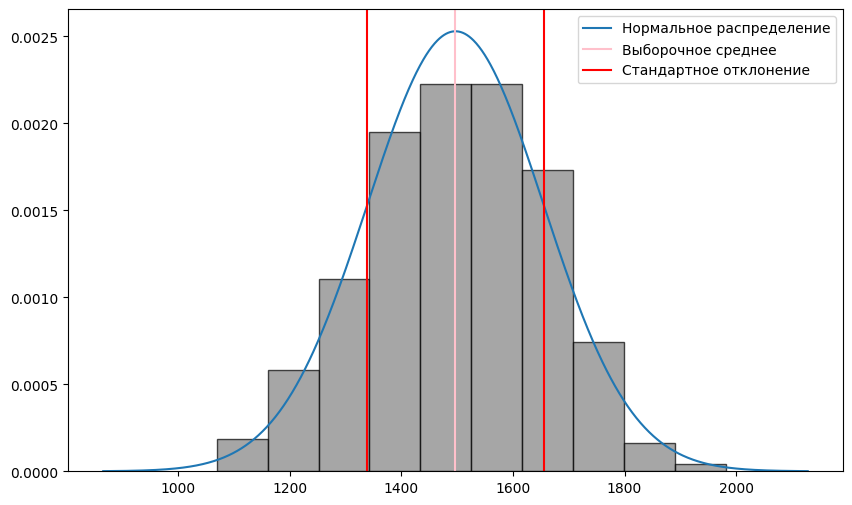

Статистика хи-квадрат: 73.85523984557989
Критическое значение хи-квадрат для уровня значимости : 16.918977604620448
Гипотеза о показательном распределении отвергается.


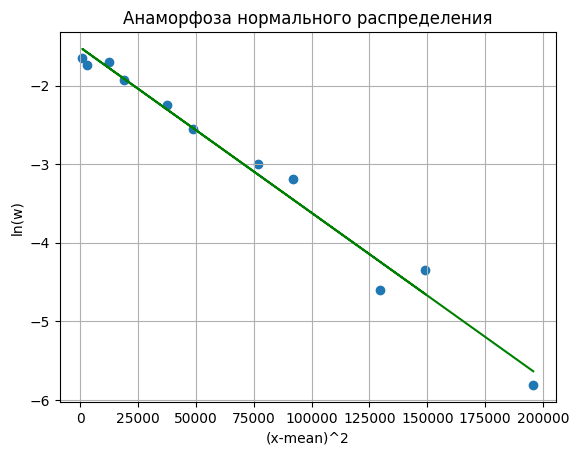

<Figure size 500x500 with 0 Axes>

Распределение соответствует нормальному 0.98 > 0.8


In [ ]:
# Параметры распределения
low = 0  # Нижняя граница
high = 100  # Верхняя граница
size = 1000  # Количество случайных чисел в каждой выборке
k = 30 # Количество выборок

# Генерация нескольких выборок
samples = [np.random.uniform(low, high, size) for _ in range(k)]

even_to_normal(samples, size, k)

# Задание №2

In [ ]:
def chi_square_test(data, bins, df, alpha=0.05):

    # Подсчет наблюдаемых частот (абсолютная частота)
    observed_frequencies, _ = np.histogram(data, bins=bins)

    # Вычисление теоретических частот
    expected_frequencies = []
    for i in range(len(bins) - 1):
        prob = stats.chi2.cdf(bins[i + 1], df) - stats.chi2.cdf(bins[i], df)
        expected_frequencies.append(prob * len(data))

    # Вычисление статистики χ²
    chi_square_stat = sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)

    # Степени свободы для критерия χ²
    degrees_of_freedom = len(bins) - 1 - 1  # Минус 1 для параметра df

    # Критическое значение для заданного уровня значимости
    critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

    # Результат теста гипотезы
    hypothesis_result = 'отвергается' if chi_square_stat > critical_value else 'не отвергается'

    print(f"Статистика χ²: {chi_square_stat}")
    print(f"Критическое значение: {critical_value}")
    print(f"Гипотеза о χ²-распределении {hypothesis_result}")

In [ ]:
def N_to_R( size, k):

    samples = [np.random.normal(mu, sigma, size) for _ in range(k)]

    R=[0]*size

    for i in range(k):
      for j in range(size):
        R[j]+=((samples[i][j]-mu)/sigma)**2

    # Параметры гамма-распределения

    theta = 1  # Масштаб параметр (scale parameter)

    # Диапазон значений x
    y = np.linspace(-0.1, np.max(R), 1000)

    # Вычисление плотности гамма-распределения
    pdf = gamma.pdf(y, k, scale=theta)

    plt.figure(figsize=(10, 6))
    plt.hist(R, density=True, alpha=0.7, color='grey', edgecolor='black')
    plt.plot(y, pdf, label = 'Теоретическая плотность распределения Пирсона')
    plt.legend()
    plt.show()

    intervals = create_bins(R)

    chi_square_test(R, intervals, k)

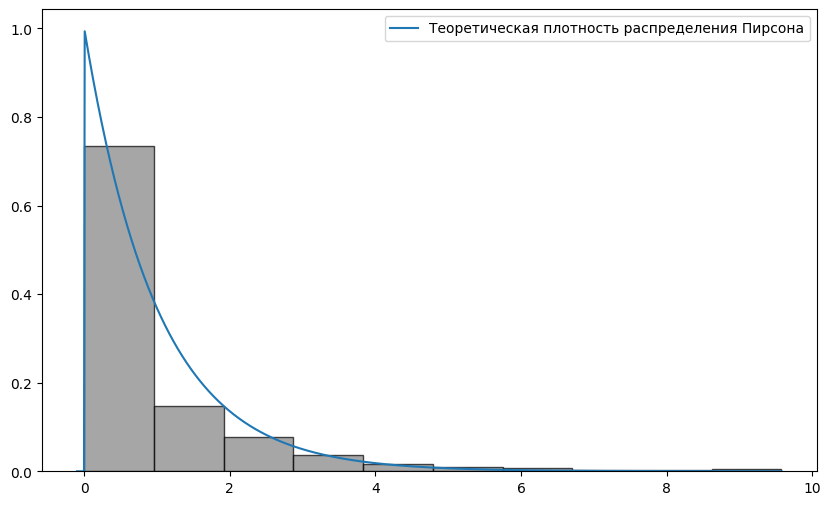

Статистика χ²: 10.402007478919089
Критическое значение: 18.307038053275146
Гипотеза о χ²-распределении не отвергается


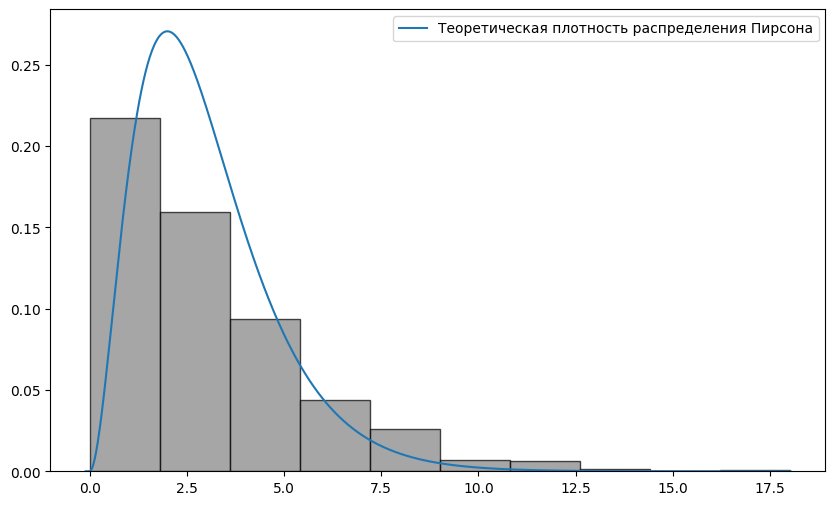

Статистика χ²: 14.922980042131154
Критическое значение: 18.307038053275146
Гипотеза о χ²-распределении не отвергается


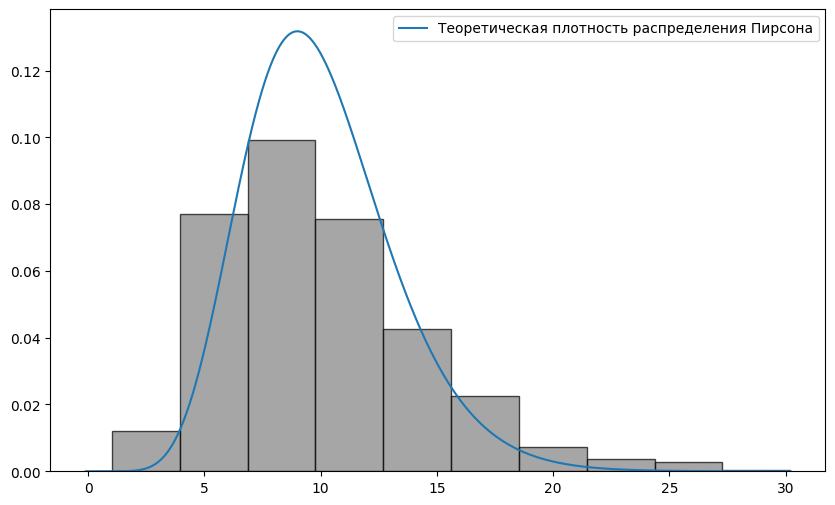

Статистика χ²: 18.43273331324631
Критическое значение: 18.307038053275146
Гипотеза о χ²-распределении отвергается


In [ ]:
# Параметры нормального распределения
mu = 0  # Математическое ожидание
sigma = 1 # Стандартное отклонение
size = 1000  # Количество случайных чисел в каждой выборке
k = [1, 3, 10]
# Генерация нескольких выборок
samples = [np.random.normal(mu, sigma, size) for i in k for _ in range(i)]

for i in k:
  N_to_R( size, i)

# Задание №3

In [ ]:
import numpy as np
import scipy.stats as stats

def chi_square_test_f_distribution(data, bins, df1, df2, alpha=0.05):

    # Подсчет наблюдаемых частот (абсолютная частота)
    observed_frequencies, _ = np.histogram(data, bins=bins)

    # Вычисление теоретических частот
    expected_frequencies = []
    for i in range(len(bins) - 1):
        prob = stats.f.cdf(bins[i + 1], df1, df2) - stats.f.cdf(bins[i], df1, df2)
        expected_frequencies.append(prob * len(data))

    # Вычисление статистики χ²
    chi_square_stat = sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)

    # Степени свободы для критерия χ²
    degrees_of_freedom = len(bins) - 1 - 2  # Минус 2 для параметров df1 и df2

    # Критическое значение для заданного уровня значимости
    critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

    # Результат теста гипотезы
    hypothesis_result = 'отвергается' if chi_square_stat > critical_value else 'не отвергается'

    print(f"Статистика χ²: {chi_square_stat}")
    print(f"Критическое значение: {critical_value}")
    print(f"Гипотеза о F-распределении {hypothesis_result}")


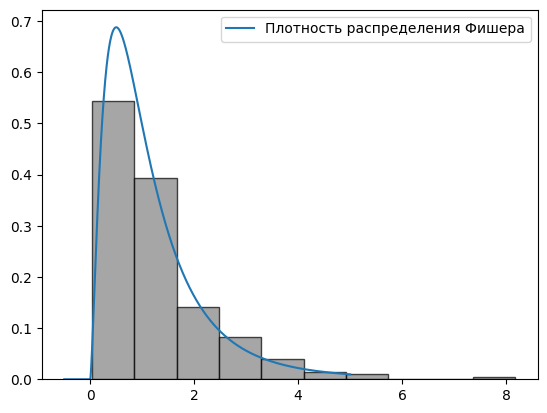

Статистика χ²: 11.123629223022094
Критическое значение: 16.918977604620448
Гипотеза о F-распределении не отвергается


In [ ]:
# Задаем степени свободы
d1 = 5  # Степень свободы для Y1
d2 = 10  # Степень свободы для Y2
size = 1000

# Генерация случайных реализаций
Y1 = np.random.chisquare(d1, size)
Y2 = np.random.chisquare(d2, size)

S=[0]*size

for i in range(size):
    S[i] += (Y1[i] / d1) / (Y2[i] / d2)

# Диапазон значений x
x = np.linspace(-0.5, 5, 1000)

# Вычисление плотности F-распределения
pdf = f.pdf(x, d1, d2)

# Построение графика
plt.hist(S,  density=True, alpha=0.7, color='grey', edgecolor='black')
plt.plot(x, pdf, label = 'Плотность распределения Фишера')
plt.legend()
plt.show()

intervals = create_bins(S)

chi_square_test_f_distribution(S, intervals, d1, d2)

# Задание №4

In [ ]:
def chi_square_test_t_distribution(data, bins, df, alpha=0.05):

    # Подсчет наблюдаемых частот (абсолютная частота)
    observed_frequencies, _ = np.histogram(data, bins=bins)

    # Вычисление теоретических частот
    expected_frequencies = []
    for i in range(len(bins) - 1):
        prob = stats.t.cdf(bins[i + 1], df) - stats.t.cdf(bins[i], df)
        expected_frequencies.append(prob * len(data))

    # Вычисление статистики χ²
    chi_square_stat = sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)

    # Степени свободы для критерия χ²
    degrees_of_freedom = len(bins) - 1 - 1  # Минус 1 для параметра df

    # Критическое значение для заданного уровня значимости
    critical_value = stats.chi2.ppf(1 - alpha, degrees_of_freedom)

    # Результат теста гипотезы
    hypothesis_result = 'отвергается' if chi_square_stat > critical_value else 'не отвергается'

    print(f"Статистика χ²: {chi_square_stat}")
    print(f"Критическое значение: {critical_value}")
    print(f"Гипотеза о t-распределении {hypothesis_result}")

In [ ]:
def N_to_T(size, k):
    # Генерация случайных величин из стандартного нормального распределения
    Z = np.random.normal(0, 1, size)

    V = np.sum(np.random.normal(0, 1, (size, k))**2, axis=1)

    T = Z / np.sqrt(V / k)

    # Диапазон значений x
    x = np.linspace(-5, 5, size)

    # Вычисление плотности t-распределения
    pdf = t.pdf(x, k)

    plt.figure(figsize=(10, 6))
    plt.hist(T, density=True, alpha=0.7, color='grey', edgecolor='black')
    plt.plot(x, pdf, label = 'Плотность распределения Стьюдента')
    plt.legend()
    plt.show()

    intervals = create_bins(T)

    chi_square_test_t_distribution(T, intervals, k)


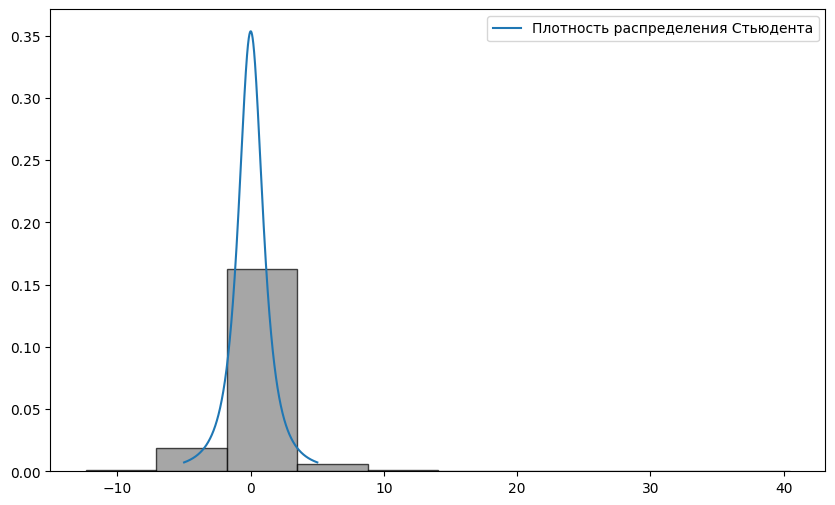

Статистика χ²: 4.458719526031724
Критическое значение: 18.307038053275146
Гипотеза о t-распределении не отвергается


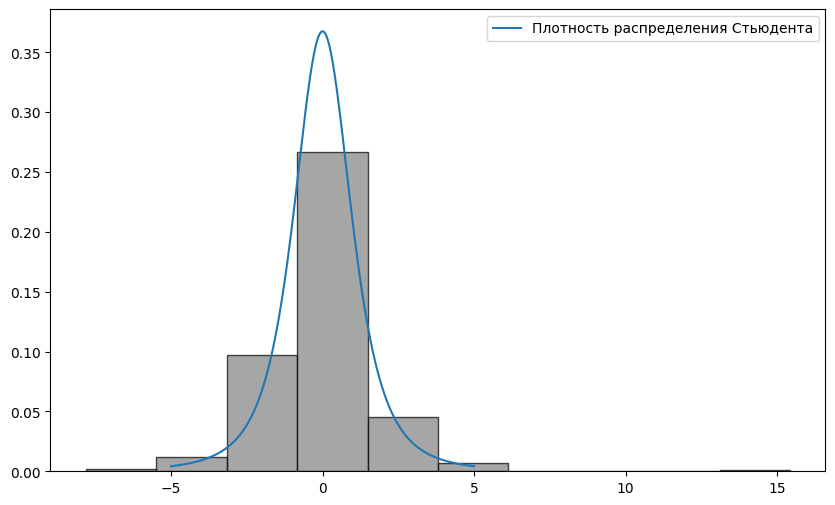

Статистика χ²: 11.995685037133462
Критическое значение: 18.307038053275146
Гипотеза о t-распределении не отвергается


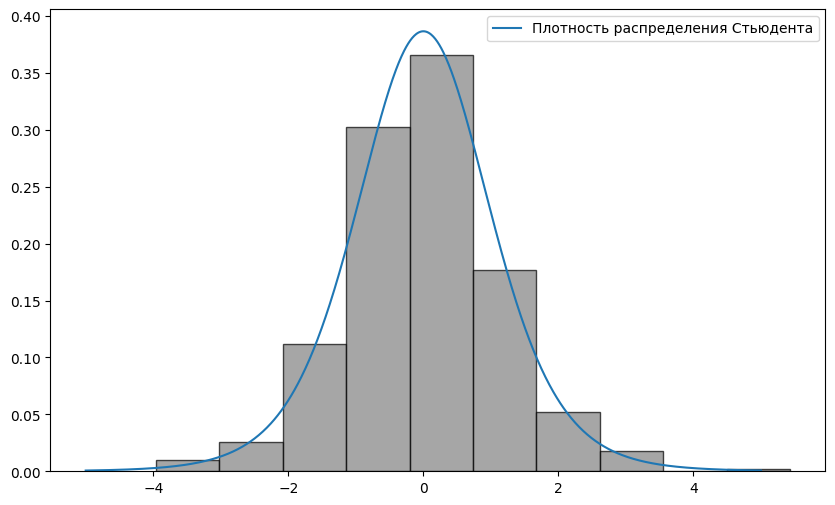

Статистика χ²: 11.335762364733855
Критическое значение: 18.307038053275146
Гипотеза о t-распределении не отвергается


In [ ]:
# Параметры t-распределения
k = [2, 3, 8]
size = 1000

for i in k:
    N_to_T(size, i)